# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Soldier Race Project (Supervised Project)</b></p>

# About Dataset

A public dataset drawn from the 2012 U.S. Army Anthropometric Survey. This sample is improved in all respects from the ANSUR 88 study and should be used in place of ANSUR 88. Note that this military population is not likely to be representative of any particular user population, but remains valuable because of the ability to explore interrelationships among the variables.

# EDA

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
import missingno as msno

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # default: 20
pd.set_option('display.max_rows', 500)    # default: 10
pd.options.display.float_format = '{:.3f}'.format

In [2]:
# Load the CSV files into DataFrames with 'latin1' encoding
male_df = pd.read_csv('ANSUR II MALE Public.csv', encoding='latin1')
female_df = pd.read_csv('ANSUR II FEMALE Public.csv', encoding='latin1')

In [3]:
# Concatenate the two DataFrames
df = pd.concat([male_df, female_df], ignore_index=True)

In [4]:
# Display the first 5 rows of the DataFrame
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,

In [5]:
# Provides a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 109 entries, subjectid to SubjectId
dtypes: float64(2), int64(98), object(9)
memory usage: 5.0+ MB


In [6]:
df.shape

(6068, 109)

In [7]:
# Generates descriptive statistics of numerical columns and transposes the result
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.000,20003.371,6568.435,10027.000,14270.250,17236.500,27315.750,29452.000
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
anklecircumference,6068.000,224.891,16.052,156.000,214.000,225.000,235.000,293.000
axillaheight,6068.000,1299.609,72.022,1038.000,1249.000,1302.000,1349.000,1553.000
balloffootcircumference,6068.000,244.193,16.845,186.000,232.000,245.000,256.000,306.000
balloffootlength,6068.000,194.755,13.516,151.000,185.000,195.000,204.000,245.000
biacromialbreadth,6068.000,399.204,30.237,283.000,376.000,404.000,421.000,489.000
bicepscircumferenceflexed,6068.000,340.934,41.520,216.000,311.000,341.000,370.000,490.000


In [8]:
df.describe(include='object').T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [ ]:
# Function to summarize the DataFrame
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (6068, 109)
___________________________
Data Types:
int64      98
object      9
float64     2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Age,int64,6068,42,0,17,58
Branch,object,6068,3,0,Combat Arms,Combat Support
Component,object,6068,3,0,Army National Guard,Regular Army
DODRace,int64,6068,7,0,1,8
Date,object,6068,253,0,1-Aug-11,9-Nov-11
Ethnicity,object,1421,210,4647,NaN,NaN
Gender,object,6068,2,0,Female,Male
Heightin,int64,6068,29,0,56,94
Installation,object,6068,12,0,Camp Atterbury,Fort Stewart
PrimaryMOS,object,6068,285,0,00Z,94Y


In [10]:
df.isnull().sum()

subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [11]:
# Combine 'subjectid' and 'SubjectId' into a single column if both exist
if 'subjectid' in df.columns and 'SubjectId' in df.columns:
    df['subjectid'] = df['subjectid'].fillna(df['SubjectId'])
    df = df.drop(columns=['SubjectId'])

In [165]:
df["subjectid"]

0       10027.000
1       10032.000
2       10033.000
3       10092.000
4       10093.000
          ...    
6063    29501.000
6064    29502.000
6065    29503.000
6066    29511.000
6067   920103.000
Name: subjectid, Length: 5769, dtype: float64

In [12]:
df.shape

(6068, 108)

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe(include='object').T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [15]:
# These columns were dropped from the data set because they were not considered necessary for race estimation.

df.drop(columns=['Heightin', 'Weightlbs', 'Date', 'SubjectNumericRace' ,'PrimaryMOS', 'Ethnicity'], inplace=True)

In [16]:
df.SubjectsBirthLocation.value_counts()

California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Arizona                      84
Missouri                     84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas                       63
South Da

In [17]:
# Define region mappings
us_states = [
    'California', 'New York', 'Texas', 'Indiana', 'Oklahoma', 'Illinois',
    'Florida', 'Minnesota', 'Michigan', 'Mississippi', 'Georgia', 'Alabama',
    'South Carolina', 'North Carolina', 'Ohio', 'Louisiana', 'Pennsylvania',
    'Virginia', 'Massachusetts', 'Wisconsin', 'New Jersey', 'Arizona',
    'Missouri', 'Colorado', 'Maryland', 'Tennessee', 'Kentucky', 'Washington',
    'Kansas', 'South Dakota', 'Iowa', 'Arkansas', 'Oregon', 'Connecticut',
    'Nebraska', 'Hawaii', 'Utah', 'West Virginia', 'Nevada', 'Idaho',
    'Rhode Island', 'District of Columbia', 'North Dakota', 'Maine', 'Delaware',
    'New Mexico', 'New Hampshire', 'Vermont', 'Montana', 'Alaska', 'Wyoming'
]

north_america = ['Canada', 'Mexico', 'Jamaica', 'Haiti', 'Puerto Rico', 'Cuba', 'Dominican Republic', 'Grenada', 'Honduras', 'Guatemala', 'Barbados', 'Trinidad and Tobago', 'Belize', 'US Virgin Islands']

europe = ['Germany', 'United Kingdom', 'Poland', 'France', 'Belgium', 'Italy', 'Romania', 'Netherlands', 'Portugal', 'Russia', 'Ukraine', 'Iceland', 'Denmark', 'Serbia', 'Bulgaria']

asia = ['Philippines', 'South Korea', 'Vietnam', 'Japan', 'China', 'India', 'Thailand', 'Taiwan', 'Turkey', 'Iran', 'Cambodia', 'Bangladesh', 'Laos']

africa = ['South Africa', 'Nigeria', 'Kenya', 'Ethiopia', 'Egypt', 'Morocco', 'Ghana', 'Cameroon', 'Sudan', 'Liberia', 'Ivory Coast', 'Togo', 'Senegal', 'Zambia']

oceania = ['Australia', 'New Zealand', 'Fiji', 'American Samoa', 'Guam', 'Micronesia', 'Northern Mariana Islands', 'Palau']

south_america = ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Ecuador', 'Paraguay', 'Venezuela', 'Bolivia', 'Guyana', 'French Guiana', 'Panama', 'Nicaragua']

# Categorize function
def categorize_location(location):
    if location in us_states:
        return 'US'
    elif location in north_america:
        return 'North America'
    elif location in europe:
        return 'Europe'
    elif location in asia:
        return 'Asia'
    elif location in africa:
        return 'Africa'
    elif location in oceania:
        return 'Oceania'
    elif location in south_america:
        return 'South America'
    else:
        return 'Other'

# Create a new DataFrame column with regions
df['Region'] = df['SubjectsBirthLocation'].apply(categorize_location)


In [18]:
# Get counts by region
df['Region'].value_counts()

US               5406
North America     234
Europe            145
Asia              129
South America      57
Other              40
Africa             32
Oceania            25
Name: Region, dtype: int64

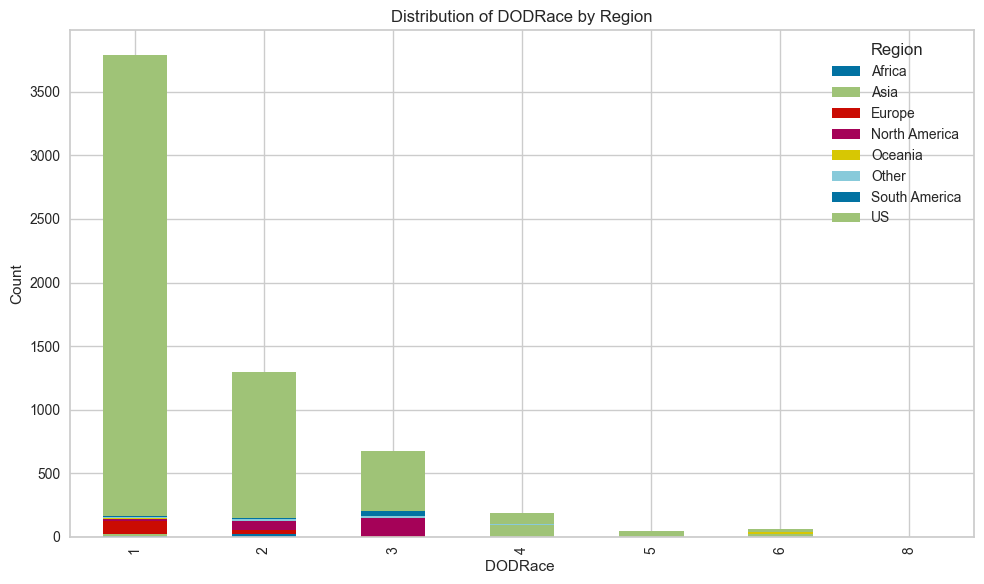

In [19]:
# Distribution of DODRace by Region
df.groupby(['DODRace', 'Region']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of DODRace by Region")
plt.ylabel("Count")
plt.xlabel("DODRace ")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

In [20]:
df.drop(columns=['SubjectsBirthLocation'], inplace=True)

In [21]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [22]:
selected_categories = [1, 2, 3]  # Specify the categories we want to keep
df = df[df['DODRace'].isin(selected_categories)]

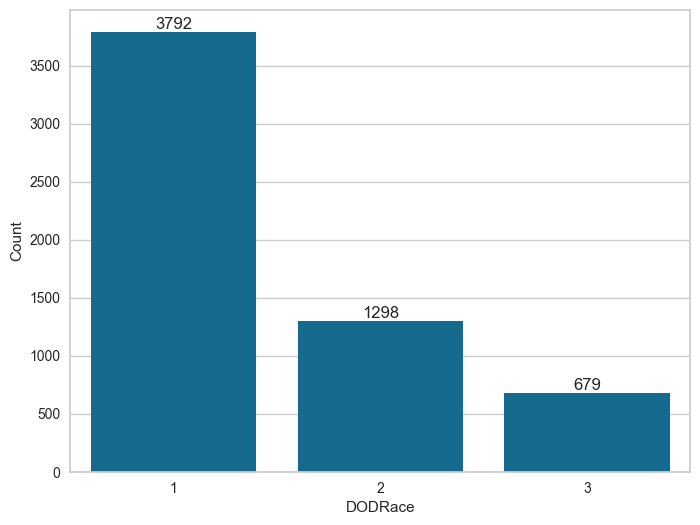

In [23]:
# Checking the percentage distribution of each races.

DODRace_digits = df.groupby('DODRace').size()
DODRace_label = pd.DataFrame(DODRace_digits,columns = ['Count'])
plt.figure(figsize = (8,6))
ax= sns.barplot(x = DODRace_label.index, y = 'Count', data = DODRace_label)
plt.bar_label(ax.containers[0]);

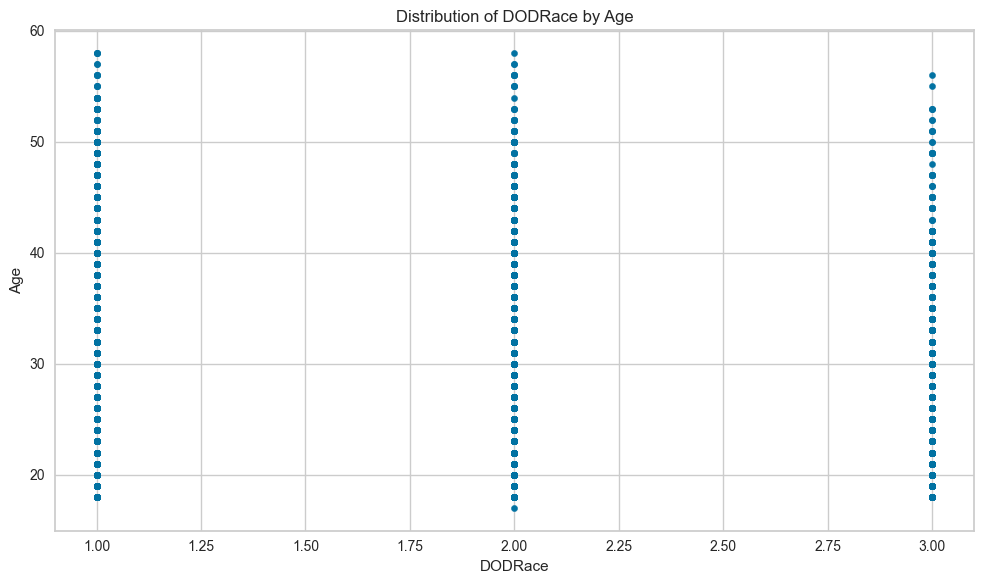

In [24]:
df.plot(kind='scatter', x='DODRace', y='Age', figsize=(10, 6))
plt.title("Distribution of DODRace by Age")
plt.ylabel("Age")
plt.xlabel("DODRace")
plt.tight_layout()
plt.show()

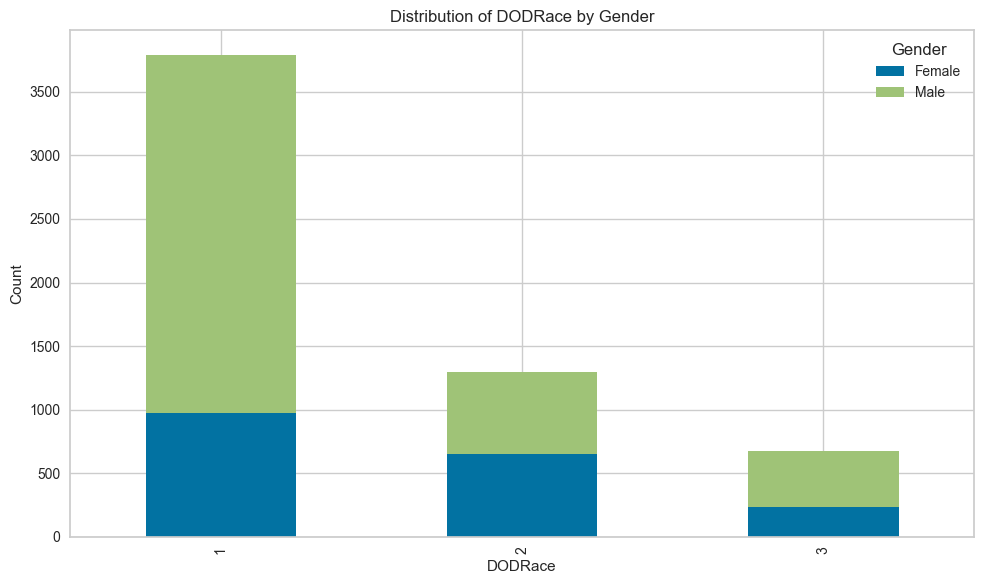

In [25]:
# Distribution of DODRace by Gender
df.groupby(['DODRace', 'Gender']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of DODRace by Gender")
plt.ylabel("Count")
plt.xlabel("DODRace")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

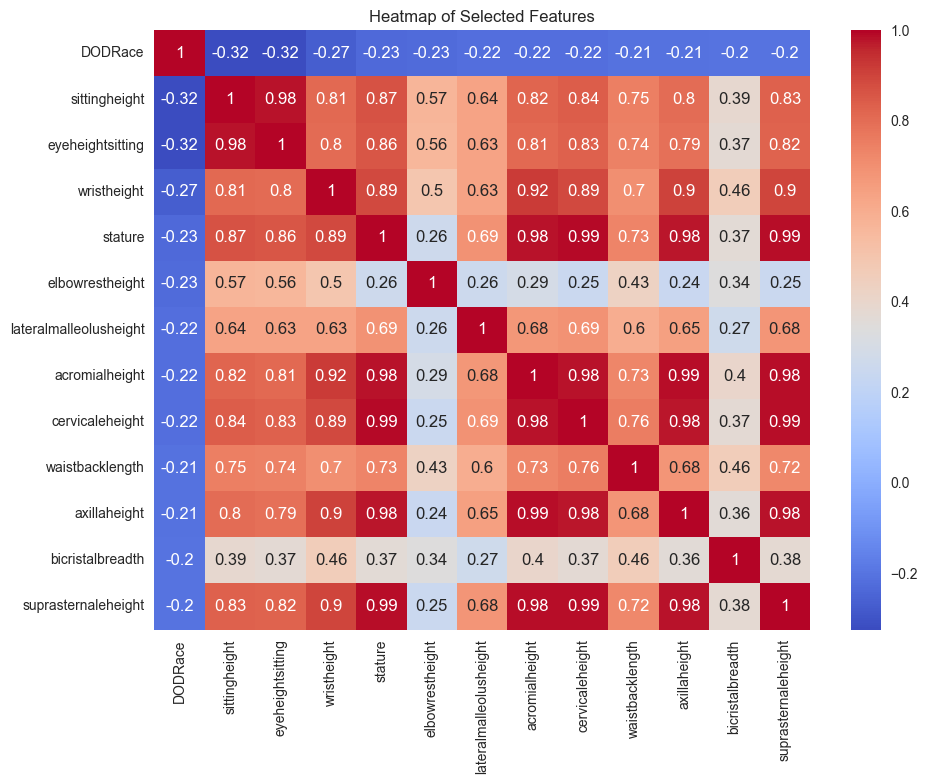

In [26]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select features with high correlation to a target variable (e.g., 'DODRace')
target_correlation = correlation_matrix['DODRace'].abs().sort_values(ascending=False)
selected_features = target_correlation[target_correlation > 0.2].index # Select features with correlation greater than 0.2

# Filter the correlation matrix
filtered_corr_matrix = correlation_matrix.loc[selected_features, selected_features]

# Plot the heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Heatmap of Selected Features")
plt.tight_layout()
plt.show()


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [27]:
# Splitting the dataset into features and target variable.
X = df.drop(columns="DODRace")
y = df.DODRace

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 

# Splitting the data into training and testing sets using the train_test_split function 
# to train the model and make predictions later.
# When dealing with an unbalanced dataset, it is essential to maintain the original distribution of the target variable (y) in both the training and testing sets. 
# That is why we use  stratify=y parameter.


In [29]:
cat_features =  df.select_dtypes(include ="object").columns
cat_features

Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object')

In [30]:
numeric_features = df.drop("DODRace", axis =1).select_dtypes(include ="number").columns
numeric_features

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbre

In [93]:
transformer = make_column_transformer(
    (StandardScaler(), numeric_features),       # For Scaling 
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),      
    remainder="passthrough"                                                                               # For Encoding 
)

In [94]:
X = transformer.fit_transform(X)

In [120]:
features = transformer.get_feature_names_out()
X = pd.DataFrame(X, columns=features)
X.head()

,standardscaler__subjectid,standardscaler__abdominalextensiondepthsitting,standardscaler__acromialheight,standardscaler__acromionradialelength,standardscaler__anklecircumference,standardscaler__axillaheight,standardscaler__balloffootcircumference,standardscaler__balloffootlength,standardscaler__biacromialbreadth,standardscaler__bicepscircumferenceflexed,standardscaler__bicristalbreadth,standardscaler__bideltoidbreadth,standardscaler__bimalleolarbreadth,standardscaler__bitragionchinarc,standardscaler__bitragionsubmandibulararc,standardscaler__bizygomaticbreadth,standardscaler__buttockcircumference,standardscaler__buttockdepth,standardscaler__buttockheight,standardscaler__buttockkneelength,standardscaler__buttockpopliteallength,standardscaler__calfcircumference,standardscaler__cervicaleheight,standardscaler__chestbreadth,standardscaler__chestcircumference,standardscaler__chestdepth,standardscaler__chestheight,standardscaler__crotchheight,standardscaler__crotchlengthomphalion,standardscaler__crotchlengthposterioromphalion,standardscaler__earbreadth,standardscaler__earlength,standardscaler__earprotrusion,standardscaler__elbowrestheight,standardscaler__eyeheightsitting,standardscaler__footbreadthhorizontal,standardscaler__footlength,standardscaler__forearmcenterofgriplength,standardscaler__forearmcircumferenceflexed,standardscaler__forearmforearmbreadth,standardscaler__forearmhandlength,standardscaler__functionalleglength,standardscaler__handbreadth,standardscaler__handcircumference,standardscaler__handlength,standardscaler__headbreadth,standardscaler__headcircumference,standardscaler__headlength,standardscaler__heelanklecircumference,standardscaler__heelbreadth,standardscaler__hipbreadth,standardscaler__hipbreadthsitting,standardscaler__iliocristaleheight,standardscaler__interpupillarybreadth,standardscaler__interscyei,standardscaler__interscyeii,standardscaler__kneeheightmidpatella,standardscaler__kneeheightsitting,standardscaler__lateralfemoralepicondyleheight,standardscaler__lateralmalleolusheight,standardscaler__lowerthighcircumference,standardscaler__mentonsellionlength,standardscaler__neckcircumference,standardscaler__neckcircumferencebase,standardscaler__overheadfingertipreachsitting,standardscaler__palmlength,standardscaler__poplitealheight,standardscaler__radialestylionlength,standardscaler__shouldercircumference,standardscaler__shoulderelbowlength,standardscaler__shoulderlength,standardscaler__sittingheight,standardscaler__sleevelengthspinewrist,standardscaler__sleeveoutseam,standardscaler__span,standardscaler__stature,standardscaler__suprasternaleheight,standardscaler__tenthribheight,standardscaler__thighcircumference,standardscaler__thighclearance,standardscaler__thumbtipreach,standardscaler__tibialheight,standardscaler__tragiontopofhead,standardscaler__trochanterionheight,standardscaler__verticaltrunkcircumferenceusa,standardscaler__waistbacklength,standardscaler__waistbreadth,standardscaler__waistcircumference,standardscaler__waistdepth,standardscaler__waistfrontlengthsitting,standardscaler__waistheightomphalion,standardscaler__weightkg,standardscaler__wristcircumference,standardscaler__wristheight,standardscaler__Age,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Installation_Camp Atterbury,onehotencoder__Installation_Camp Shelby,onehotencoder__Installation_Fort Bliss,onehotencoder__Installation_Fort Bragg,onehotencoder__Installation_Fort Drum,onehotencoder__Installation_Fort Gordon,onehotencoder__Installation_Fort Hood,onehotencoder__Installation_Fort Huachuca,onehotencoder__Installation_Fort Lee,onehotencoder__Installation_Fort McCoy,onehotencoder__Installation_Fort Rucker,onehotencoder__Installation_Fort Stewart,onehotencoder__Component_Army National Guard,onehotencoder__Component_Army Reserve,onehotencoder__Component_Regular Army,onehotencoder__Branch_Combat Arms,onehotencoder__Branch_Combat Service Support,onehotencoder__Branch_Combat Support,onehotencoder__WritingPreference_Either hand 

In [121]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 101)
Train target shape   :  (4615,)
Test features shape  :  (1154, 101)
Test target shape    :  (1154,)


In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Modelling


## Logistic model

In [33]:
model = LogisticRegression(class_weight='balanced', random_state=42)  # Logistic Regression Model
operations = [ ("transformer", transformer), ("logistic", model)] 

log_model = Pipeline(operations)  # Creating a Pipeline

log_model.fit(X_train, y_train)  # Fitting the model

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidb...
       'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth',
       'waistfrontlengthsitting', 'waistheightomphalion', 'weightkg',
       'wristcircumference', 'wristheight', 'Age'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                ('logistic',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [34]:
eval_metric(log_model, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[634  16 108]
 [ 10 230  20]
 [ 37   8  91]]
              precision    recall  f1-score   support

           1       0.93      0.84      0.88       758
           2       0.91      0.88      0.89       260
           3       0.42      0.67      0.51       136

    accuracy                           0.83      1154
   macro avg       0.75      0.80      0.76      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[2583   54  397]
 [  24  963   51]
 [  77   29  437]]
              precision    recall  f1-score   support

           1       0.96      0.85      0.90      3034
           2       0.92      0.93      0.92      1038
           3       0.49      0.80      0.61       543

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



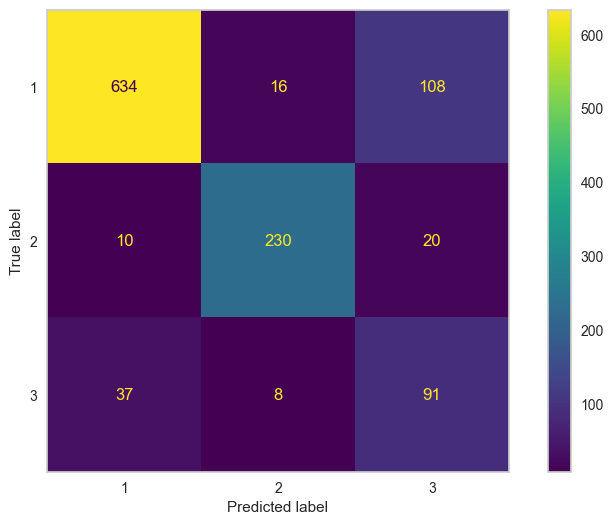

In [35]:
disp = ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test)
plt.grid(False)
plt.show()

### Logistic model GridSearch

In [44]:
# pipeline for logistic regression
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=5000)  # Logistic Regression Model
operations = [("transformer", transformer), ("logistic", model)]

pipe_model = Pipeline(steps=operations)

param_grid = {
    "logistic__penalty": ["l1", "l2"],
    "logistic__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "logistic__solver": ["liblinear", "saga"],  # Compatible solvers for 'l1' and 'l2'
    'logistic__class_weight': ['balanced'],
    'logistic__max_iter': [50, 100, 200, 300, 400]
}

In [46]:
log_grid_model = GridSearchCV(pipe_model, param_grid, 
                              cv=10, scoring='accuracy', 
                              n_jobs=-1, return_train_score=True)

log_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bice...
      dtype='object'))])),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=5000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 10, 100],
                         'logistic__class_weight': ['balanced'],
                         'logistic__max_iter': [100, 200, 300, 400],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='accuracy')

In [47]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[698  19  41]
 [ 15 238   7]
 [ 50  12  74]]
              precision    recall  f1-score   support

           1       0.91      0.92      0.92       758
           2       0.88      0.92      0.90       260
           3       0.61      0.54      0.57       136

    accuracy                           0.88      1154
   macro avg       0.80      0.79      0.80      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[2843   54  137]
 [  48  970   20]
 [ 165   44  334]]
              precision    recall  f1-score   support

           1       0.93      0.94      0.93      3034
           2       0.91      0.93      0.92      1038
           3       0.68      0.62      0.65       543

    accuracy                           0.90      4615
   macro avg       0.84      0.83      0.83      4615
weighted avg       0.90      0.90      0.90      4615



In [48]:
y_pred_test = log_grid_model.predict(X_test)
y_pred_train = log_grid_model.predict(X_train)

In [49]:
log_accuracy_test = accuracy_score(y_test, y_pred_test)
log_accuracy_train = accuracy_score(y_train, y_pred_train)

log_f1_test = f1_score(y_test, y_pred_test, average='weighted')
log_f1_train = f1_score(y_train, y_pred_train, average='weighted')

log_recall_test = recall_score(y_test, y_pred_test, average='weighted')
log_recall_train = recall_score(y_train, y_pred_train, average='weighted')

print("Logistic Accuracy (Test):", log_accuracy_test)
print("Logistic Accuracy (Train):", log_accuracy_train)
print("Logistic F1 Score (Test):", log_f1_test)
print("Logistic F1 Score (Train):", log_f1_train)
print("Logistic Recall (Test):", log_recall_test)
print("Logistic Recall (Train):", log_recall_train)

# 

Logistic Accuracy (Test): 0.8752166377816292
Logistic Accuracy (Train): 0.8985915492957747
Logistic F1 Score (Test): 0.8731991433915259
Logistic F1 Score (Train): 0.8970116927971035
Logistic Recall (Test): 0.8752166377816292
Logistic Recall (Train): 0.8985915492957747


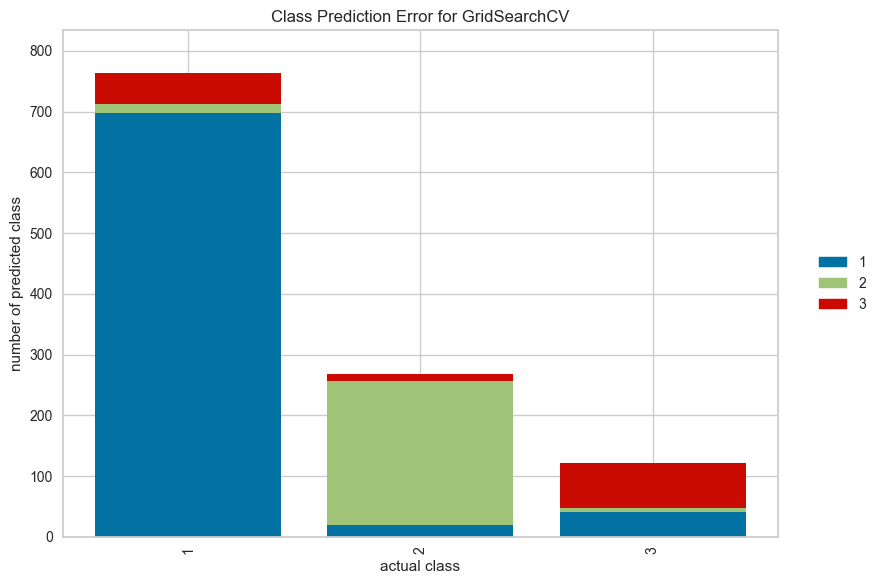

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [50]:
visualizer = ClassPredictionError(log_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

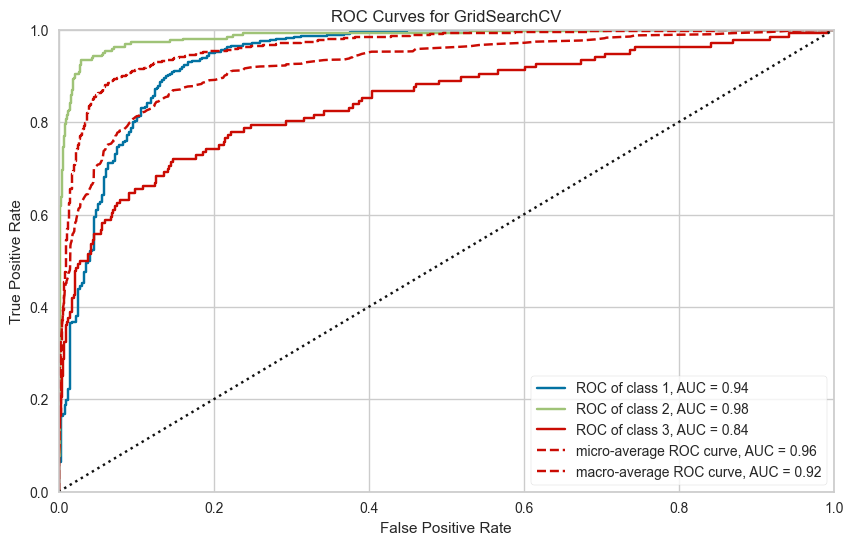

In [51]:
visualizer = ROCAUC(log_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

## SVC

In [52]:
model = SVC(class_weight='balanced', random_state=42)  # Support Vector Classifier Model

operations = [ ("transformer", transformer), ("svc", model)]

SVM_model = Pipeline(operations)  # Creating a Pipeline 
SVM_model.fit(X_train, y_train)  # Fitting the model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicri...
       'waistfrontlengthsitting', 'waistheightomphalion', 'weightkg',
       'wristcircumference', 'wristheight', 'Age'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                ('svc', SVC(class_weight='balanced', random_state=42))])

In [53]:
eval_metric(SVM_model, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[638  18 102]
 [  9 239  12]
 [ 39  13  84]]
              precision    recall  f1-score   support

           1       0.93      0.84      0.88       758
           2       0.89      0.92      0.90       260
           3       0.42      0.62      0.50       136

    accuracy                           0.83      1154
   macro avg       0.75      0.79      0.76      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[2684   42  308]
 [  25  992   21]
 [  54   16  473]]
              precision    recall  f1-score   support

           1       0.97      0.88      0.93      3034
           2       0.94      0.96      0.95      1038
           3       0.59      0.87      0.70       543

    accuracy                           0.90      4615
   macro avg       0.84      0.90      0.86      4615
weighted avg       0.92      0.90      0.91      4615



In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(SVM_model, X_test, y_test)
plt.grid(False)
plt.show()

### SVC Best Parameters (GridsearchCV)

In [54]:
param_grid = {
    'svc__C': np.linspace(0.1, 0.5, 1),          # Regularization parameter
    'svc__gamma': ["scale", "auto", 0.1, 0.5, 1],  # Kernel coefficient
    'svc__kernel': ['rbf', 'linear', 'sigmoid'],          # Kernel types
    'svc__degree': [1, 2, 3]                   # Degree of the polynomial kernel (only for 'poly' kernel)
}
# Defining hyperparameter space.

In [55]:
model = SVC()  # Support Vector Classifier Model
operations = [("transformer", transformer), ("svc", model)]
pipe_model = Pipeline(steps=operations)

SVM_grid_model = GridSearchCV(pipe_model, param_grid, 
                              cv=10, scoring='recall_weighted', 
                              n_jobs=-1, return_train_score=True)

SVM_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bice...
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': array([0.1]), 'svc__degree': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 0.1, 0.5, 1],
                         'svc__kernel': ['rbf', 'linear', 'sigmoid']},
             return_train_score=True, scoring='recall_weighted')

In [56]:
y_pred_test = SVM_grid_model.predict(X_test)
y_pred_train = SVM_grid_model.predict(X_train)

In [57]:
eval_metric(SVM_grid_model, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[733  12  13]
 [ 22 235   3]
 [ 68   6  62]]
              precision    recall  f1-score   support

           1       0.89      0.97      0.93       758
           2       0.93      0.90      0.92       260
           3       0.79      0.46      0.58       136

    accuracy                           0.89      1154
   macro avg       0.87      0.78      0.81      1154
weighted avg       0.89      0.89      0.88      1154


Train_Set
[[2969   30   35]
 [  62  960   16]
 [ 265   34  244]]
              precision    recall  f1-score   support

           1       0.90      0.98      0.94      3034
           2       0.94      0.92      0.93      1038
           3       0.83      0.45      0.58       543

    accuracy                           0.90      4615
   macro avg       0.89      0.78      0.82      4615
weighted avg       0.90      0.90      0.89      4615



In [58]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

SVM_f1_test = f1_score(y_test, y_pred_test, average='weighted')
SVM_f1_train = f1_score(y_train, y_pred_train, average='weighted')

SVM_recall_test = recall_score(y_test, y_pred_test, average='weighted')
SVM_recall_train = recall_score(y_train, y_pred_train, average='weighted')

print("SVM Accuracy (Test):", SVM_accuracy_test)
print("SVM Accuracy (Train):", SVM_accuracy_train)
print("SVM F1 Score (Test):", SVM_f1_test)
print("SVM F1 Score (Train):", SVM_f1_train)
print("SVM Recall (Test):", SVM_recall_test)
print("SVM Recall (Train):", SVM_recall_train)

SVM Accuracy (Test): 0.8925476603119584
SVM Accuracy (Train): 0.9042253521126761
SVM F1 Score (Test): 0.8837732895305425
SVM F1 Score (Train): 0.8946566517579742
SVM Recall (Test): 0.8925476603119584
SVM Recall (Train): 0.9042253521126761


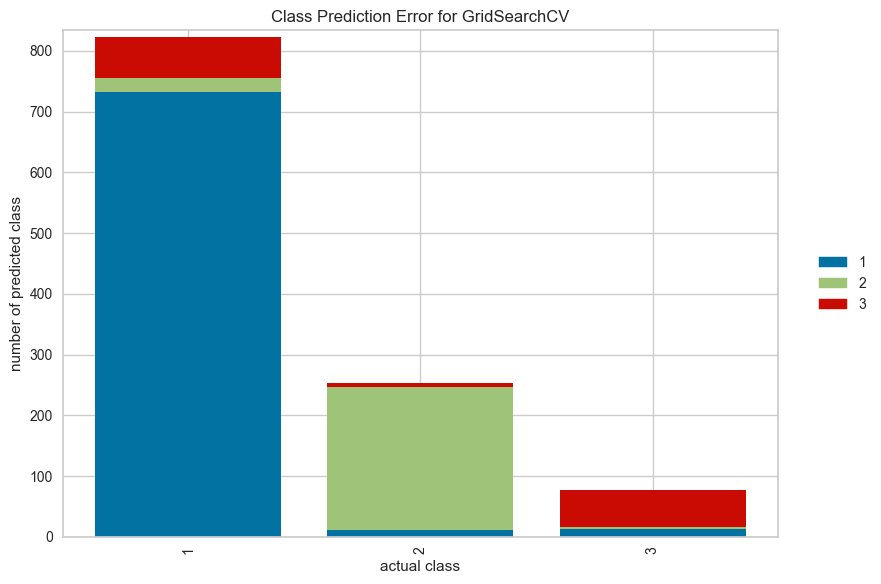

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [59]:
visualizer = ClassPredictionError(SVM_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

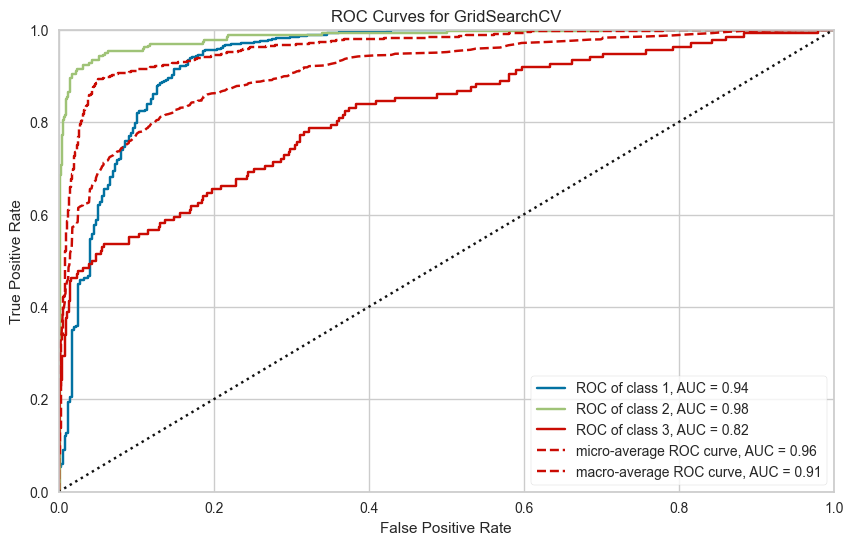

In [60]:
visualizer = ROCAUC(SVM_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

## Random Forest

In [61]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)  # Random Forest Classifier Model

operations = [ ("transformer", transformer), ("rf", model)]

RF_model = Pipeline(operations)

RF_model.fit(X_train, y_train)  # Fitting the model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicri...
       'waistfrontlengthsitting', 'waistheightomphalion', 'weightkg',
       'wristcircumference', 'wristheight', 'Age'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [62]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[748   6   4]
 [ 79 180   1]
 [102  10  24]]
              precision    recall  f1-score   support

           1       0.81      0.99      0.89       758
           2       0.92      0.69      0.79       260
           3       0.83      0.18      0.29       136

    accuracy                           0.82      1154
   macro avg       0.85      0.62      0.66      1154
weighted avg       0.83      0.82      0.79      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



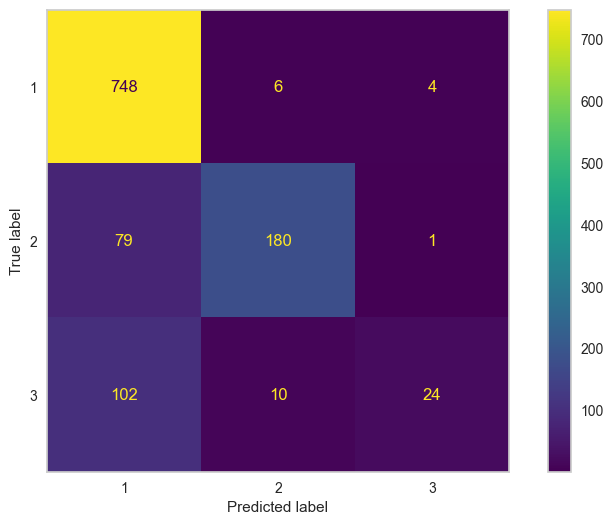

In [122]:
disp = ConfusionMatrixDisplay.from_estimator(RF_model, X_test, y_test)
plt.grid(False)
plt.show()

### Random Forest GridSearch

In [112]:
param_grid = {                   # Split criterion
    'rf__max_depth': [4, 5, 6],                # Maximum depth of the tree
    'rf__max_features': [ 0.8, 1.0],  # Maximum features to consider
    'rf__max_leaf_nodes': [150, 200, 250],            # Maximum number of leaf nodes
    'rf__n_estimators': [50, 100, 200],               # Number of trees in the forest
    'rf__min_samples_split': [3, 4, 5],                 # Minimum samples required to split a node
    'rf__min_samples_leaf': [ 2, 3, 4]                   # Minimum samples required at each leaf
}
cv = StratifiedKFold(n_splits=5)

In [113]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)  # Random Forest Classifier Model
operations = [("transformer", transformer), ("rf", model)]
pipe_model = Pipeline(steps=operations)

RF_grid_model = GridSearchCV(pipe_model, param_grid, cv=cv,
                             scoring='recall_weighted', 
                             n_jobs=-1, verbose=2, return_train_score=True) 

RF_grid_model.fit(X_train, y_train)       

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootci...
      dtype='object'))])),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [4, 5, 6],
                         'rf__max_features': [0.8, 1.0],
                         'rf__max_leaf_nodes': [150, 200, 250],
                         'rf__min_samples_leaf': [2, 3, 4],
                         'rf__min_samples_split': [3, 4, 5],
                         'rf__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='recall_weighted', verbose=2)

In [114]:
eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[547  67 144]
 [ 27 206  27]
 [ 47  17  72]]
              precision    recall  f1-score   support

           1       0.88      0.72      0.79       758
           2       0.71      0.79      0.75       260
           3       0.30      0.53      0.38       136

    accuracy                           0.71      1154
   macro avg       0.63      0.68      0.64      1154
weighted avg       0.77      0.71      0.73      1154


Train_Set
[[2390  174  470]
 [  83  897   58]
 [ 113   17  413]]
              precision    recall  f1-score   support

           1       0.92      0.79      0.85      3034
           2       0.82      0.86      0.84      1038
           3       0.44      0.76      0.56       543

    accuracy                           0.80      4615
   macro avg       0.73      0.80      0.75      4615
weighted avg       0.84      0.80      0.81      4615



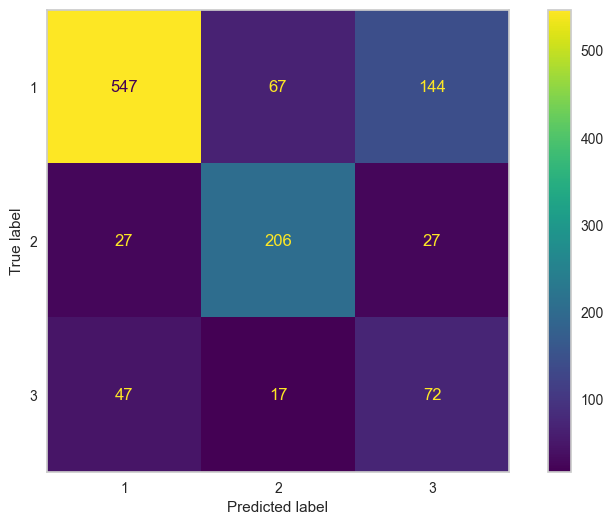

In [123]:
disp = ConfusionMatrixDisplay.from_estimator(RF_grid_model, X_test, y_test)
plt.grid(False)
plt.show()

In [115]:
y_pred_test = RF_grid_model.predict(X_test)
y_pred_train = RF_grid_model.predict(X_train)

In [116]:
RF_accuracy_test = accuracy_score(y_test, y_pred_test)
RF_accuracy_train = accuracy_score(y_train, y_pred_train)

RF_f1_test = f1_score(y_test, y_pred_test, average='macro')
RF_f1_train = f1_score(y_train, y_pred_train, average='macro')

RF_recall_test = recall_score(y_test, y_pred_test, average='weighted')
RF_recall_train = recall_score(y_train, y_pred_train, average='weighted')

print("RF Accuracy (Test):", RF_accuracy_test)
print("RF Accuracy (Train):", RF_accuracy_train)
print("RF F1 Score (Test):", RF_f1_test)
print("RF F1 Score (Train):", RF_f1_train)
print("RF Recall (Test):", RF_recall_test)
print("RF Recall (Train):", RF_recall_train)

RF Accuracy (Test): 0.7149046793760832
RF Accuracy (Train): 0.8017334777898159
RF F1 Score (Test): 0.6407888791848718
RF F1 Score (Train): 0.7503252584017481
RF Recall (Test): 0.7149046793760832
RF Recall (Train): 0.8017334777898159


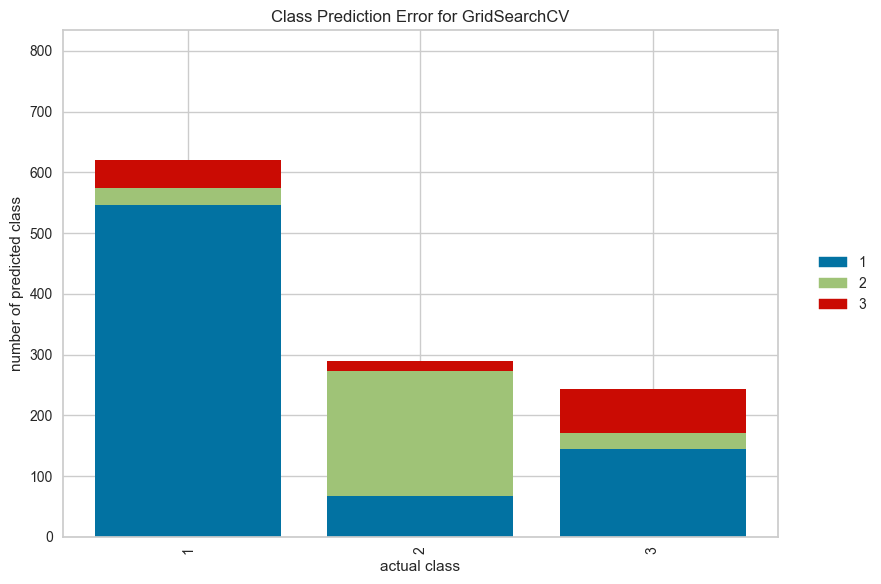

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [124]:
visualizer = ClassPredictionError(RF_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

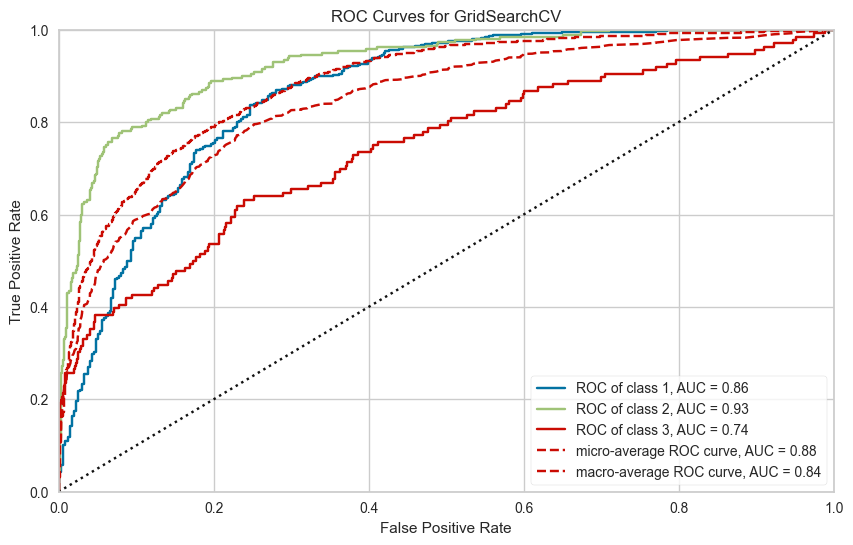

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [125]:
visualizer = ROCAUC(RF_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

# AdaBoost

In [119]:
model = AdaBoostClassifier(random_state=42)  # AdaBoost Classifier Model

operations = [ ("transformer", transformer), ("ada", model)]

Ada_model = Pipeline(operations)

Ada_model.fit(X_train, y_train)  # Fitting the model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicri...
       'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth',
       'waistfrontlengthsitting', 'waistheightomphalion', 'weightkg',
       'wristcircumference', 'wristheight', 'Age'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                ('ada', AdaBoostClassifier(random_state=42))])

In [66]:
eval_metric(Ada_model, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[720  28  10]
 [ 51 204   5]
 [ 81  13  42]]
              precision    recall  f1-score   support

           1       0.85      0.95      0.89       758
           2       0.83      0.78      0.81       260
           3       0.74      0.31      0.44       136

    accuracy                           0.84      1154
   macro avg       0.80      0.68      0.71      1154
weighted avg       0.83      0.84      0.82      1154


Train_Set
[[2907   86   41]
 [ 172  845   21]
 [ 330   53  160]]
              precision    recall  f1-score   support

           1       0.85      0.96      0.90      3034
           2       0.86      0.81      0.84      1038
           3       0.72      0.29      0.42       543

    accuracy                           0.85      4615
   macro avg       0.81      0.69      0.72      4615
weighted avg       0.84      0.85      0.83      4615



In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(Ada_model, X_test, y_test)
plt.grid(False) 
plt.show()

### AdaBoost GridSearch

In [67]:
model = AdaBoostClassifier(random_state=42)  # AdaBoost Classifier Model
operations = [("transformer", transformer), ("ada", model)]
pipe_model = Pipeline(steps=operations)

param_grid = {
    'ada__n_estimators': [50, 100, 200, 300],           # Number of boosting rounds
    'ada__learning_rate': [1, 0.1, 0.3, 0.01]   # Shrinkage applied to weights
}

In [69]:
Ada_grid_model = GridSearchCV(pipe_model, param_grid, 
                              cv=10, scoring='accuracy', 
                              n_jobs=-1, verbose = 2, return_train_score=True)

Ada_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bice...
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                                       ('ada',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [1, 0.1, 0.3, 0.01],
                         'ada__n_estimators': [50, 100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [70]:
eval_metric(Ada_grid_model, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[710  15  33]
 [ 35 216   9]
 [ 65  14  57]]
              precision    recall  f1-score   support

           1       0.88      0.94      0.91       758
           2       0.88      0.83      0.86       260
           3       0.58      0.42      0.49       136

    accuracy                           0.85      1154
   macro avg       0.78      0.73      0.75      1154
weighted avg       0.84      0.85      0.84      1154


Train_Set
[[2895   24  115]
 [  61  962   15]
 [ 214   16  313]]
              precision    recall  f1-score   support

           1       0.91      0.95      0.93      3034
           2       0.96      0.93      0.94      1038
           3       0.71      0.58      0.63       543

    accuracy                           0.90      4615
   macro avg       0.86      0.82      0.84      4615
weighted avg       0.90      0.90      0.90      4615



In [71]:
y_pred = Ada_grid_model.predict(X_test)
y_pred_proba = Ada_grid_model.predict_proba(X_test)

In [72]:
Ada_accuracy_test = accuracy_score(y_test, y_pred_test)   
Ada_accuracy_train = accuracy_score(y_train, y_pred_train)

Ada_f1_test = f1_score(y_test, y_pred_test, average='macro')
Ada_f1_train = f1_score(y_train, y_pred_train, average='macro')

Ada_recall_test = recall_score(y_test, y_pred_test, average='weighted')
Ada_recall_train = recall_score(y_train, y_pred_train, average='weighted')

print("Ada Accuracy (Test):", Ada_accuracy_test)
print("Ada Accuracy (Train):", Ada_accuracy_train)
print("Ada F1 Score (Test):", Ada_f1_test)
print("Ada F1 Score (Train):", Ada_f1_train)
print("Ada Recall (Test):", Ada_recall_test)
print("Ada Recall (Train):", Ada_recall_train)

Ada Accuracy (Test): 0.8925476603119584
Ada Accuracy (Train): 0.9042253521126761
Ada F1 Score (Test): 0.8076266055466302
Ada F1 Score (Train): 0.8171821308455854
Ada Recall (Test): 0.8925476603119584
Ada Recall (Train): 0.9042253521126761


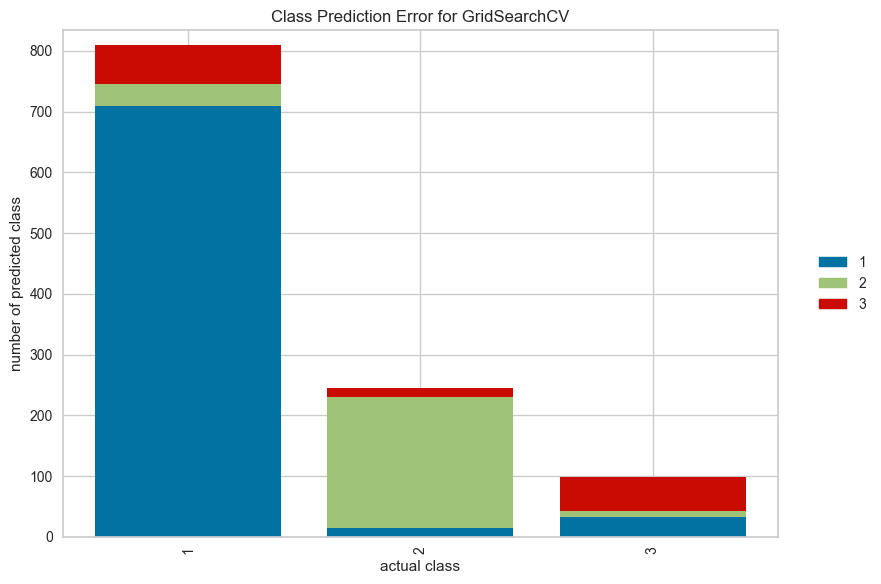

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [73]:
visualizer = ClassPredictionError(Ada_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

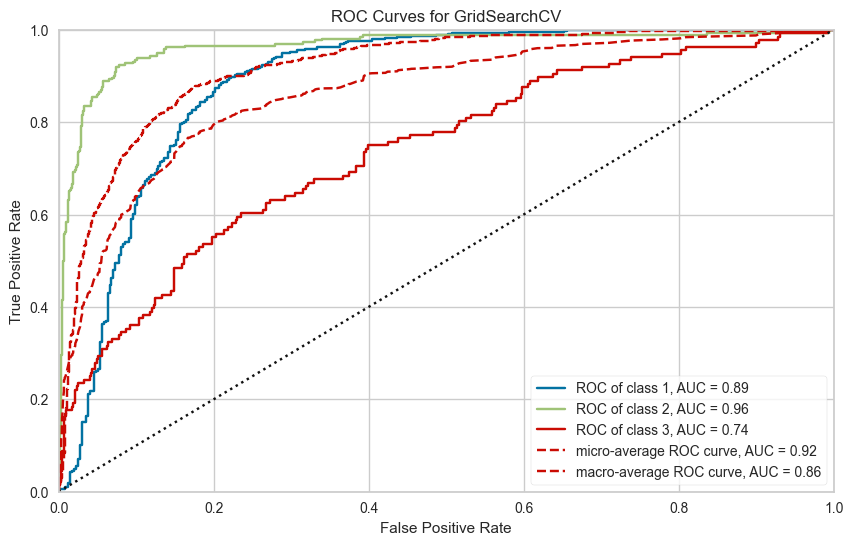

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [74]:
visualizer = ROCAUC(Ada_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

# Gradient Boosting

In [79]:
model = GradientBoostingClassifier(random_state=42)  # Gradient Boosting Classifier Model
operations = [ ("transformer", transformer), ("gb", model)]

GB_model = Pipeline(operations)

GB_model.fit(X_train, y_train)  # Fitting the model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicri...
       'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth',
       'waistfrontlengthsitting', 'waistheightomphalion', 'weightkg',
       'wristcircumference', 'wristheight', 'Age'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                ('gb', GradientBoostingClassifier(random_state=42))])

In [80]:
eval_metric(GB_model, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[735  15   8]
 [ 36 215   9]
 [ 75  10  51]]
              precision    recall  f1-score   support

           1       0.87      0.97      0.92       758
           2       0.90      0.83      0.86       260
           3       0.75      0.38      0.50       136

    accuracy                           0.87      1154
   macro avg       0.84      0.72      0.76      1154
weighted avg       0.86      0.87      0.85      1154


Train_Set
[[3009   11   14]
 [  83  947    8]
 [ 239   20  284]]
              precision    recall  f1-score   support

           1       0.90      0.99      0.95      3034
           2       0.97      0.91      0.94      1038
           3       0.93      0.52      0.67       543

    accuracy                           0.92      4615
   macro avg       0.93      0.81      0.85      4615
weighted avg       0.92      0.92      0.91      4615



###  GB GridSearch(best parameters)

In [86]:
model = GradientBoostingClassifier(random_state=42)  # Gradient Boosting Classifier Model
operations = [("transformer", transformer), ("gb", model)]
pipe_model = Pipeline(steps=operations)

param_grid = {'gb__n_estimators': [100, 200, 300],
               "gb__subsample": [0.5, 0.8, 1],
            "gb__max_features": [None, 2, 3,4],
             "gb__learning_rate": [ 0.1, 0.5, 1],
             "gb__max_depth": [3, 4, 5]}

cv = StratifiedKFold(n_splits = 5)

In [87]:
GB_grid_model = GridSearchCV(pipe_model, param_grid, 
                              cv=cv, scoring='recall_weighted', 
                              n_jobs=-1, return_train_score=True, verbose=2)

GB_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootci...
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                                       ('gb',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': [0.1, 0.5, 1],
                         'gb__max_depth': [3, 4, 5],
                         'gb__max_features': [None, 2, 3, 4],
                         'gb__n_estimators': [100, 200, 300],
                         'gb__subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='recall_weighted', verbose=2)

In [89]:
eval_metric(GB_grid_model, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[730  11  17]
 [ 26 229   5]
 [ 71  12  53]]
              precision    recall  f1-score   support

           1       0.88      0.96      0.92       758
           2       0.91      0.88      0.89       260
           3       0.71      0.39      0.50       136

    accuracy                           0.88      1154
   macro avg       0.83      0.74      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [90]:
y_pred = GB_grid_model.predict(X_test)
y_pred_proba = GB_grid_model.predict_proba(X_test)

In [91]:
GB_accuracy_test = accuracy_score(y_test, y_pred_test)   
GB_accuracy_train = accuracy_score(y_train, y_pred_train)

GB_f1_test = f1_score(y_test, y_pred_test, average='macro')
GB_f1_train = f1_score(y_train, y_pred_train, average='macro')

GB_recall_test = recall_score(y_test, y_pred_test, average='weighted')
GB_recall_train = recall_score(y_train, y_pred_train, average='weighted')

print("GB Accuracy (Test):", GB_accuracy_test)
print("GB Accuracy (Train):", GB_accuracy_train)
print("GB F1 Score (Test):", GB_f1_test)
print("GB F1 Score (Train):", GB_f1_train)
print("GB Recall (Test):", GB_recall_test)
print("GB Recall (Train):", GB_recall_train)

GB Accuracy (Test): 0.8925476603119584
GB Accuracy (Train): 0.9042253521126761
GB F1 Score (Test): 0.8076266055466302
GB F1 Score (Train): 0.8171821308455854
GB Recall (Test): 0.8925476603119584
GB Recall (Train): 0.9042253521126761


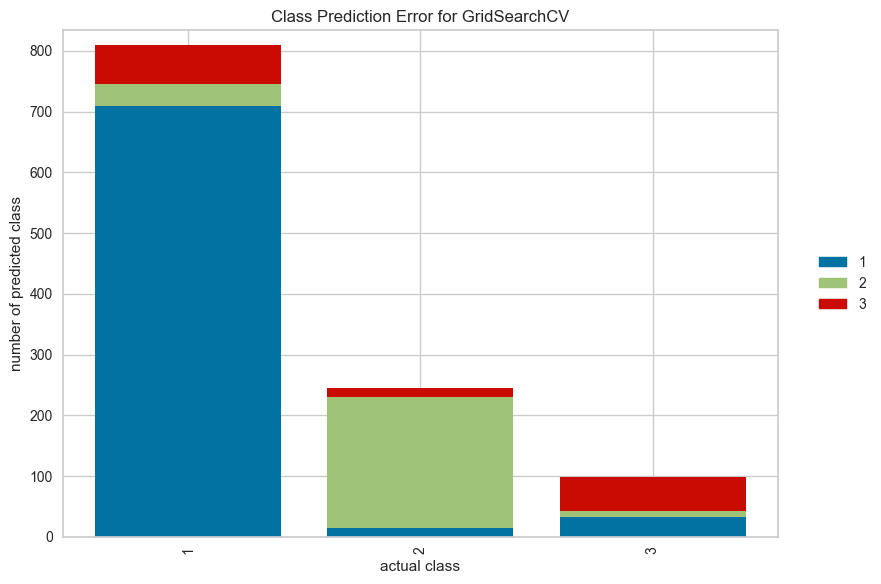

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [129]:
visualizer = ClassPredictionError(Ada_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

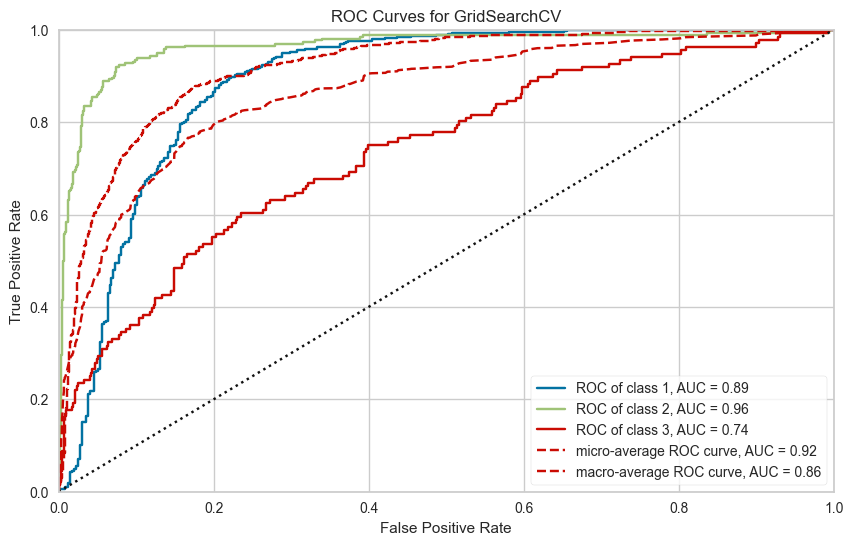

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [130]:
visualizer = ROCAUC(Ada_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

# XGBoost

In [132]:
df.DODRace.value_counts()

# for this model we shoud start our target from 0

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [133]:
model = XGBClassifier(random_state=42)  # XGBM Classifier Model
operations = [ ("transformer", transformer), ("xgb", model)]

XGB_model = Pipeline(operations)

# Adjust class labels to start at 0
y_train_adjusted = y_train - y_train.min()
y_test_adjusted = y_test - y_train.min()  # Adjust test labels in the same way

# Fit the pipeline with adjusted labels
XGB_model.fit(X_train, y_train_adjusted)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicri...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [135]:
eval_metric(XGB_model, X_train, y_train_adjusted, X_test, y_test_adjusted)  # Evaluating the model

Test_Set
[[735  14   9]
 [ 26 228   6]
 [ 75  14  47]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       758
           1       0.89      0.88      0.88       260
           2       0.76      0.35      0.47       136

    accuracy                           0.88      1154
   macro avg       0.84      0.73      0.76      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost GridSearch

In [146]:
model = XGBClassifier(random_state=42)  # XGBM Classifier Model
operations = [("transformer", transformer), ("xgb", model)]

pipe_model = Pipeline(steps=operations)

param_grid = {
    "xgb__n_estimators": [100, 200, 300],
    'xgb__max_depth': [ 4, 5,6],
    "xgb__learning_rate": [0.1, 0.3],
    "xgb__subsample": [0.5, 0.8],
    "xgb__colsample_bytree": [0.5, 1]
}

In [147]:
XGB_grid_model = GridSearchCV(pipe_model, param_grid, 
                              cv=5, scoring='accuracy', 
                              n_jobs=-1, verbose=2, return_train_score=True)

XGB_grid_model.fit(X_train, y_train_adjusted)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicep...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.5, 1],
                         'xgb__learning_rate': [0.1, 0.3],
                         'xgb__max_depth': [4, 5, 6],
                         'xgb__n_estimators': [100, 200, 300],
                         'xgb__subsample': [0.5, 0.8]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [149]:
eval_metric(XGB_grid_model, X_train, y_train_adjusted, X_test, y_test_adjusted)  # Evaluating the model

Test_Set
[[731  13  14]
 [ 25 231   4]
 [ 74   9  53]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       758
           1       0.91      0.89      0.90       260
           2       0.75      0.39      0.51       136

    accuracy                           0.88      1154
   macro avg       0.85      0.75      0.78      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [156]:
print("Unique y_train labels:", y_train.unique())
print("Unique y_test labels:", y_test.unique())

Unique y_train labels: [1 2 3]
Unique y_test labels: [1 3 2]


In [154]:
y_pred_test = XGB_grid_model.predict(X_test)
y_pred_train = XGB_grid_model.predict(X_train)

In [157]:
XGB_accuracy_test = accuracy_score(y_test_adjusted, y_pred_test)   
XGB_accuracy_train = accuracy_score(y_train_adjusted, y_pred_train)

XGB_f1_test = f1_score(y_test_adjusted, y_pred_test, average='macro')
XGB_f1_train = f1_score(y_train_adjusted, y_pred_train, average='macro')

XGB_recall_test = recall_score(y_test_adjusted, y_pred_test, average='weighted')
XGB_recall_train = recall_score(y_train_adjusted, y_pred_train, average='weighted')

print("XGB Accuracy (Test):", XGB_accuracy_test)
print("XGB Accuracy (Train):", XGB_accuracy_train)
print("XGB F1 Score (Test):", XGB_f1_test)
print("XGB F1 Score (Train):", XGB_f1_train)
print("XGB Recall (Test):", XGB_recall_test)
print("XGB Recall (Train):", XGB_recall_train)

XGB Accuracy (Test): 0.8795493934142115
XGB Accuracy (Train): 1.0
XGB F1 Score (Test): 0.7777723339488062
XGB F1 Score (Train): 1.0
XGB Recall (Test): 0.8795493934142115
XGB Recall (Train): 1.0


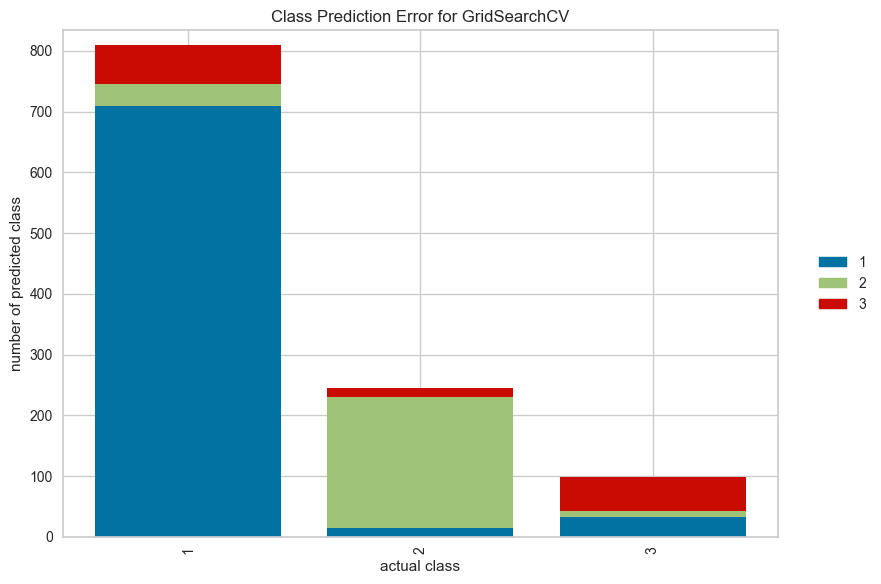

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [152]:
visualizer = ClassPredictionError(Ada_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

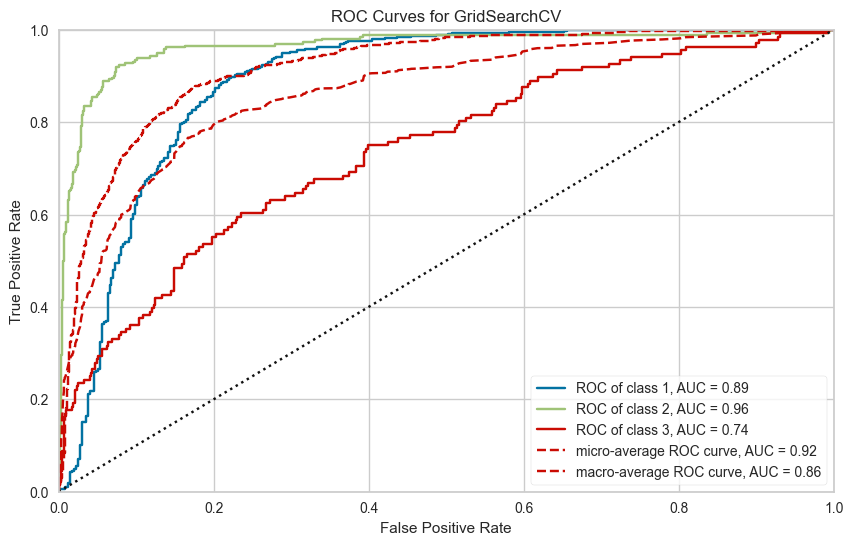

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [153]:
visualizer = ROCAUC(Ada_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

# LightGBM

In [99]:
model = LGBMClassifier(random_state=42)  # LGBM Classifier Model

operations = [ ("transformer", transformer), ("lgbm", model)]

LGBM_model = Pipeline(operations)

LGBM_model.fit(X_train, y_train)  # Fitting the model

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15144
[LightGBM] [Info] Number of data points in the train set: 4615, number of used features: 123
[LightGBM] [Info] Start training from score -0.419430
[LightGBM] [Info] Start training from score -1.492016
[LightGBM] [Info] Start training from score -2.139958


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicri...
       'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth',
       'waistfrontlengthsitting', 'waistheightomphalion', 'weightkg',
       'wristcircumference', 'wristheight', 'Age'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                ('lgbm', LGBMClassifier(random_state=42))])

In [100]:
eval_metric(LGBM_model, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[735  13  10]
 [ 27 228   5]
 [ 77  12  47]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92       758
           2       0.90      0.88      0.89       260
           3       0.76      0.35      0.47       136

    accuracy                           0.88      1154
   macro avg       0.85      0.73      0.76      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### LGBM GridSearch

In [105]:
model = LGBMClassifier(random_state=42)  # LGBM Classifier Model
operations = [("transformer", transformer), ("lgbm", model)]
pipe_model = Pipeline(steps=operations)

param_grid = {'lgbm__learning_rate': [0.1, 0.2, 0.3],
                'lgbm__n_estimators': [50, 200, 300],
                'lgbm__max_depth': [4, 5, 6],
                'lgbm__subsample': [0.5, 0.8],
                'lgbm__colsample_bytree': [0.5, 0.7],
                'lgbm__num_leaves': [20, 30, 50],}

cv = StratifiedKFold(n_splits = 5)

In [106]:
LGBM_grid_model = GridSearchCV(pipe_model, param_grid, 
                              cv=cv, scoring='recall_weighted', 
                              n_jobs=-1,verbose=2, return_train_score=True)

LGBM_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15144
[LightGBM] [Info] Number of data points in the train set: 4615, number of used features: 123
[LightGBM] [Info] Start training from score -0.419430
[LightGBM] [Info] Start training from score -1.492016
[LightGBM] [Info] Start training from score -2.139958
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootci...
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                                       ('lgbm',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'lgbm__colsample_bytree': [0.5, 0.7],
                         'lgbm__learning_rate': [0.1, 0.2, 0.3],
                         'lgbm__max_depth': [4, 5, 6],
                         'lgbm__n_estimators': [50, 200, 300],
                         'lgbm__num_leaves': [20, 30, 50],
                         'lgbm__subsample': [0.5, 0.8]},
             return_train_score=True, scoring='recall_weighted', verbose=2)

In [107]:
eval_metric(LGBM_grid_model, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[734   9  15]
 [ 27 231   2]
 [ 76  10  50]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92       758
           2       0.92      0.89      0.91       260
           3       0.75      0.37      0.49       136

    accuracy                           0.88      1154
   macro avg       0.85      0.74      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [108]:
y_pred_test = LGBM_grid_model.predict(X_test)
y_pred_train = LGBM_grid_model.predict(X_train)

In [109]:
LGBM_accuracy_test = accuracy_score(y_test, y_pred_test)     
LGBM_accuracy_train = accuracy_score(y_train, y_pred_train)

LGBM_f1_test = f1_score(y_test, y_pred_test, average='macro')
LGBM_f1_train = f1_score(y_train, y_pred_train, average='macro')

LGBM_recall_test = recall_score(y_test, y_pred_test, average='weighted')
LGBM_recall_train = recall_score(y_train, y_pred_train, average='weighted')

print("LGBM Accuracy (Test):", LGBM_accuracy_test)
print("LGBM Accuracy (Train):", LGBM_accuracy_train)
print("LGBM F1 Score (Test):", LGBM_f1_test)
print("LGBM F1 Score (Train):", LGBM_f1_train)
print("LGBM Recall (Test):", LGBM_recall_test)
print("LGBM Recall (Train):", LGBM_recall_train)

LGBM Accuracy (Test): 0.8795493934142115
LGBM Accuracy (Train): 1.0
LGBM F1 Score (Test): 0.7729564553093965
LGBM F1 Score (Train): 1.0
LGBM Recall (Test): 0.8795493934142115
LGBM Recall (Train): 1.0


In [ ]:
visualizer = ClassPredictionError(LGBM_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

In [ ]:
visualizer = ROCAUC(LGBM_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

## Comparing Models

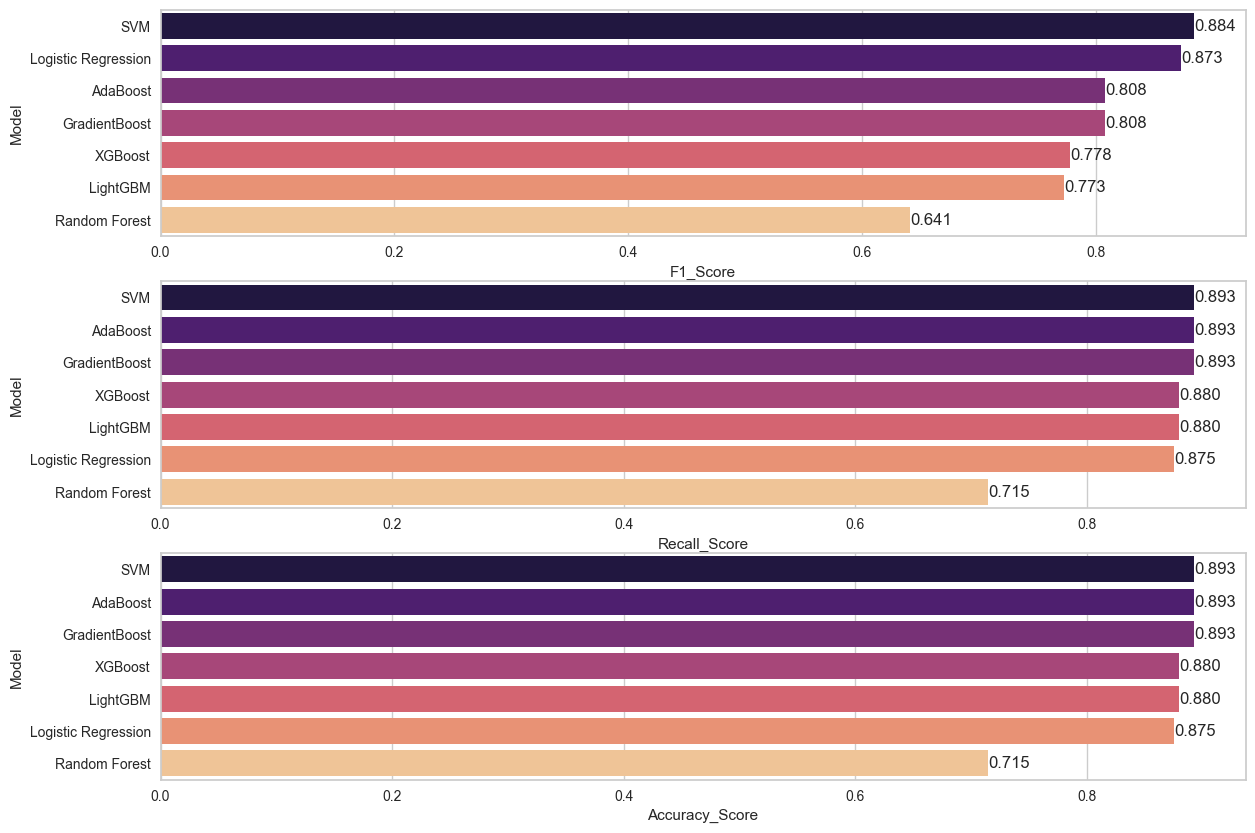

In [160]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost", "LightGBM"],
                        "F1_Score": [log_f1_test, SVM_f1_test, RF_f1_test, Ada_f1_test, GB_f1_test, XGB_f1_test, LGBM_f1_test],
                        "Recall_Score": [log_recall_test, SVM_recall_test, RF_recall_test, Ada_recall_test, GB_recall_test, 
                                   XGB_recall_test, LGBM_recall_test],
                        "Accuracy_Score": [log_accuracy_test, SVM_accuracy_test, RF_accuracy_test, Ada_accuracy_test, GB_accuracy_test, 
                                    XGB_accuracy_test, LGBM_accuracy_test]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="Accuracy_Score", ascending=False)
ax=sns.barplot(x="Accuracy_Score", y="Model", data=compare, palette="magma")
labels(ax)
plt.show()

In [162]:
import pickle

# Saving Best Model
pickle.dump(Ada_grid_model, open("Ada_grid_model", "wb"))

# ada_grid_model
Ada_grid_model = pickle.load(open("Ada_grid_model", "rb"))


In [173]:
X = df.drop(columns=["DODRace"])
y = df['DODRace']

In [163]:
Ada_grid_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicri...
       'waistfrontlengthsitting', 'waistheightomphalion', 'weightkg',
       'wristcircumference', 'wristheight', 'Age'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                ('ada',
                 AdaBoostClassifier(learning_rate=1, n_estimators=300,
                                    random_state=42))])

In [174]:

# Define the pipeline
operations = [
    ("transformer", transformer),
    ("AdaBoost", AdaBoostClassifier(learning_rate=0.1, n_estimators=300, random_state=42))
]
final_model = Pipeline(steps=operations)

# Fit the pipeline
final_model.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicri...
       'waistfrontlengthsitting', 'waistheightomphalion', 'weightkg',
       'wristcircumference', 'wristheight', 'Age'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                ('AdaBoost',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=300,
                                    random_state=42))])

In [175]:
y_pred = final_model.predict(X)
y_pred_proba = final_model.predict_proba(X)

In [177]:
eval_metric(final_model, X, y, X, y)  # Evaluating the model

Test_Set
[[3735   41   16]
 [ 326  956   16]
 [ 467   46  166]]
              precision    recall  f1-score   support

           1       0.82      0.98      0.90      3792
           2       0.92      0.74      0.82      1298
           3       0.84      0.24      0.38       679

    accuracy                           0.84      5769
   macro avg       0.86      0.66      0.70      5769
weighted avg       0.85      0.84      0.82      5769


Train_Set
[[3735   41   16]
 [ 326  956   16]
 [ 467   46  166]]
              precision    recall  f1-score   support

           1       0.82      0.98      0.90      3792
           2       0.92      0.74      0.82      1298
           3       0.84      0.24      0.38       679

    accuracy                           0.84      5769
   macro avg       0.86      0.66      0.70      5769
weighted avg       0.85      0.84      0.82      5769



# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

**SMOTE (Synthetic Minority Over-sampling Technique)**

In [186]:
df['DODRace'] = df['DODRace'].map({1: 0, 2: 1, 3: 2})

In [189]:
X = df.drop(columns=["DODRace"])
y= df['DODRace']

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [201]:
from imblearn.pipeline import Pipeline  # Use imblearn's Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import make_column_transformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the transformer for preprocessing
transformer = make_column_transformer(
    (StandardScaler(), numeric_features),  # Scale numeric features
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),  # One-hot encode categorical features
    remainder="passthrough"
)

# Define SMOTE for balancing the dataset
smote = SMOTE(sampling_strategy={0: 3059, 1: 3059, 2: 3059}, random_state=42)

# Define the pipeline
steps = [
    ('transformer', transformer),  # Preprocessing step
    ('smote', smote),              # Apply SMOTE after preprocessing
    ('ada', AdaBoostClassifier(random_state=42))  # Train AdaBoostClassifier
]

ada_pipe_smote = Pipeline(steps=steps)

# Fit the pipeline to the data
ada_pipe_smote.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicri...
       'wristcircumference', 'wristheight', 'Age'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                ('smote',
                 SMOTE(random_state=42,
                       sampling_strategy={0: 3059, 1: 3059, 2: 3059})),
                ('ada', AdaBoostClassifier(random_state=42))])

In [202]:
eval_metric(ada_pipe_smote, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[626  46  86]
 [ 35 199  26]
 [ 53  15  68]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       758
           1       0.77      0.77      0.77       260
           2       0.38      0.50      0.43       136

    accuracy                           0.77      1154
   macro avg       0.67      0.70      0.68      1154
weighted avg       0.79      0.77      0.78      1154


Train_Set
[[2577  135  322]
 [ 113  855   70]
 [ 222   53  268]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      3034
           1       0.82      0.82      0.82      1038
           2       0.41      0.49      0.45       543

    accuracy                           0.80      4615
   macro avg       0.70      0.72      0.71      4615
weighted avg       0.81      0.80      0.81      4615



#### Smote(GridSearch)

In [208]:
# Define the pipeline with SMOTE

operations = [ ('transformer', transformer),  # Preprocessing step
    ('smote', SMOTE(random_state=42)),  # SMOTE step for oversampling
    ('ada', AdaBoostClassifier(random_state=42)) ] # Model step

ada_pipe_smote = Pipeline(operations)

In [214]:
param_grid = {'smote__sampling_strategy': [{0: 3059, 1: 3059, 2: 3059}],
    'ada__n_estimators': [50, 100, 200, 300],
                'ada__learning_rate': [1, 0.1, 0.3, 0.01]}

In [215]:
smote_grid_model = GridSearchCV(ada_pipe_smote, param_grid, 
                                scoring='accuracy', cv=10, n_jobs=-1, verbose=2)

smote_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bice...
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('ada',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [1, 0.1, 0.3, 0.01],
                         'ada__n_estimators': [50, 100, 200, 300],
                         'smote__sampling_strategy': [{0: 3059, 1: 3059,
                                                       2: 3059}]},
             scoring='accuracy', verbose=2)

In [217]:
eval_metric(smote_grid_model, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[674  22  62]
 [ 33 215  12]
 [ 53  10  73]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       758
           1       0.87      0.83      0.85       260
           2       0.50      0.54      0.52       136

    accuracy                           0.83      1154
   macro avg       0.75      0.75      0.75      1154
weighted avg       0.84      0.83      0.84      1154


Train_Set
[[2786   55  193]
 [  89  891   58]
 [ 199   35  309]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3034
           1       0.91      0.86      0.88      1038
           2       0.55      0.57      0.56       543

    accuracy                           0.86      4615
   macro avg       0.79      0.78      0.79      4615
weighted avg       0.87      0.86      0.86      4615



#  SHAP

**SHAP (SHapley Additive exPlanations)**

In [268]:
import shap
from patsy import dmatrices

In [269]:
X= df.drop(columns=["DODRace"])
y = df['DODRace']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [276]:
# Create a pipeline
operations = [
    ('transformer', transformer),
    ('ada', AdaBoostClassifier(random_state=42))
]
shap_pipe = Pipeline(steps = operations)
shap_pipe.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicri...
       'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth',
       'waistfrontlengthsitting', 'waistheightomphalion', 'weightkg',
       'wristcircumference', 'wristheight', 'Age'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
       'Region'],
      dtype='object'))])),
                ('ada', AdaBoostClassifier(random_state=42))])

In [272]:
eval_metric(shap_pipe, X_train, y_train, X_test, y_test)  # Evaluating the model

Test_Set
[[730  17  11]
 [ 46 209   5]
 [ 81  11  44]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       758
           1       0.88      0.80      0.84       260
           2       0.73      0.32      0.45       136

    accuracy                           0.85      1154
   macro avg       0.82      0.70      0.73      1154
weighted avg       0.84      0.85      0.84      1154


Train_Set
[[2919   74   41]
 [ 167  850   21]
 [ 323   47  173]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3034
           1       0.88      0.82      0.85      1038
           2       0.74      0.32      0.44       543

    accuracy                           0.85      4615
   macro avg       0.82      0.70      0.73      4615
weighted avg       0.85      0.85      0.84      4615



In [277]:
explainer= shap.TreeExplainer(shap_pipe.named_steps['ada'])
shap_values = explainer.shap_values(shap_pipe.named_steps['transformer'].transform(X)[:50])


InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>